In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [48]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [49]:
train_df.shape

(60000, 785)

In [50]:
test_df.shape

(10000, 785)

In [51]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_array = np.array(train_df, dtype = 'float32')
test_array = np.array(test_df, dtype = 'float32')

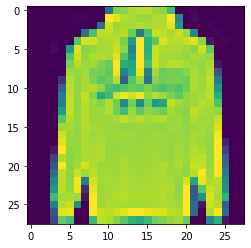

In [53]:
plt.imshow(train_array[55000,1:].reshape(28,28))

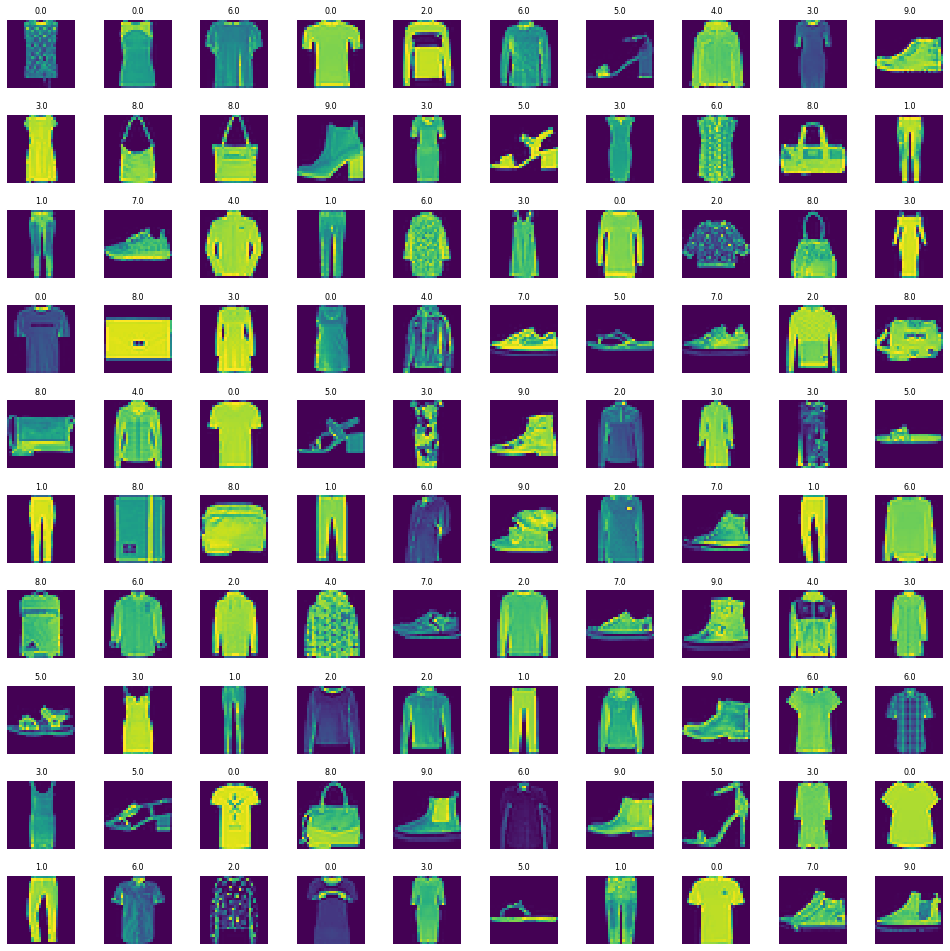

In [54]:
grid_width = 10
grid_length = 10

fig, axes = plt.subplots(grid_length, grid_width, figsize = (17,17))
axes = axes.ravel()

train_size = len(train_array)

for i in np.arange(0, grid_width*grid_length):
    index = random.randint(0,train_size)
    axes[i].imshow(train_array[index, 1:].reshape(28,28))
    axes[i].set_title(train_array[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [181]:
X_train = train_array[:, 1:]/255
Y_train = train_array[:,0]
X_test = test_array[:,1:]/255
Y_test = test_array[:,0]

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 12)

In [184]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [185]:
X_train.shape

(48000, 28, 28, 1)

In [186]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [187]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))

In [188]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [189]:
cnn_model.add(Flatten())

In [190]:
cnn_model.add(Dense(32, activation = 'relu'))

In [191]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [194]:
cnn_model.add(Dropout(rate = 0.2))

In [195]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [196]:
epochs = 50
cnn_model.fit(X_train,
    Y_train,
    batch_size=512,
    epochs=50,
    verbose=1,
    validation_data=(X_validate, Y_validate))

Epoch 1/50
94/94 [==============================] - 2s 22ms/step - loss: 3.5975 - accuracy: 0.3790 - val_loss: 1.2073 - val_accuracy: 0.6603
Epoch 2/50
94/94 [==============================] - 1s 14ms/step - loss: 1.5064 - accuracy: 0.5846 - val_loss: 0.9978 - val_accuracy: 0.7168
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 1.2046 - accuracy: 0.6220 - val_loss: 0.7747 - val_accuracy: 0.7548
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 1.1194 - accuracy: 0.6379 - val_loss: 0.7191 - val_accuracy: 0.7700
Epoch 5/50
94/94 [==============================] - 1s 15ms/step - loss: 1.0771 - accuracy: 0.6504 - val_loss: 0.7164 - val_accuracy: 0.7823
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 1.0444 - accuracy: 0.6567 - val_loss: 0.6821 - val_accuracy: 0.7908
Epoch 7/50
94/94 [==============================] - 1s 16ms/step - loss: 1.0238 - accuracy: 0.6637 - val_loss: 0.6645 - val_accuracy: 0.7971
Epoch 8/50
94

In [197]:
evaluation = cnn_model.evaluate(X_test, Y_test)
print('Test accuracy:{:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 731us/step - loss: 0.4468 - accuracy: 0.8631
Test accuracy:0.863


In [198]:
X_test.shape

(10000, 28, 28, 1)

In [199]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 9, 9, 64)          640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
Total params: 33,770
Trainable params: 33,770
Non-trainable params: 0
__________________________________________________

In [200]:
predicted_classes = cnn_model.predict_classes(X_test)
#predicted_classes = predicted_classes.astype(np.int64)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

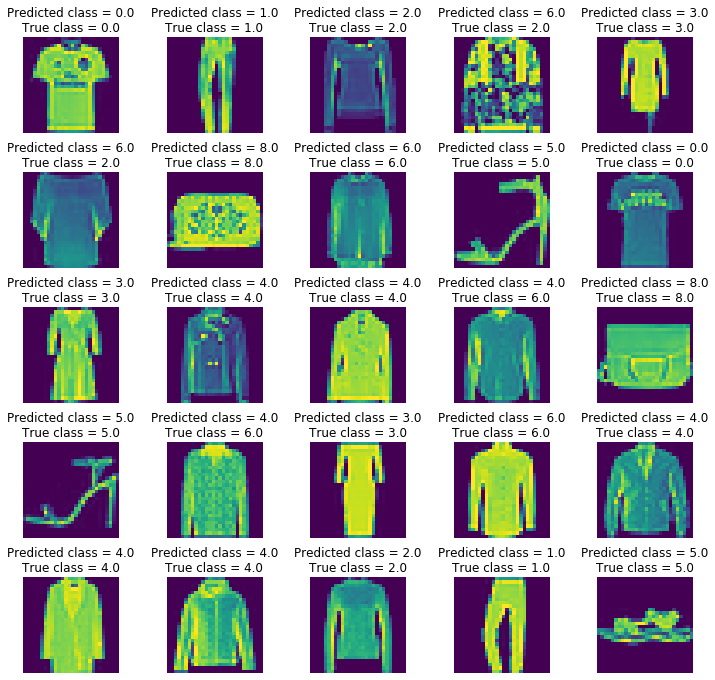

In [201]:
W = 5
L = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()


for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Predicted class = {:0.1f}\nTrue class = {:0.1f}'.format(predicted_classes[i], Y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

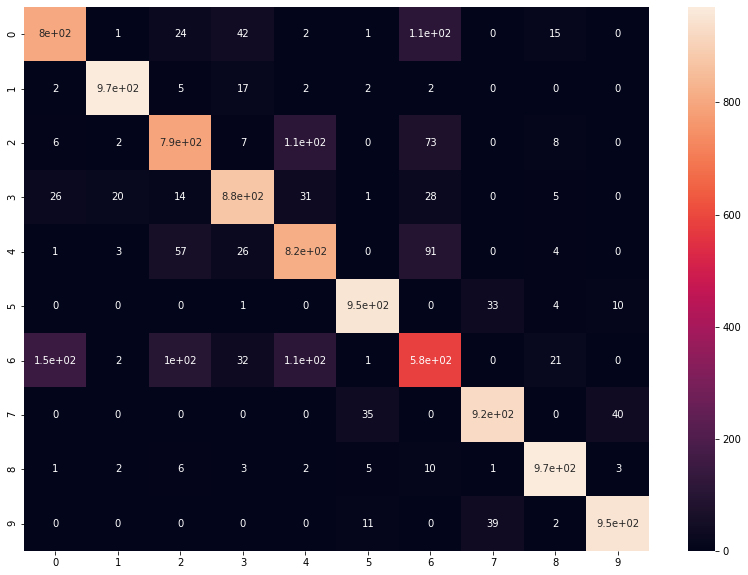

In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [203]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.80      0.81      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.79      0.79      0.79      1000
     Class 3       0.87      0.88      0.87      1000
     Class 4       0.76      0.82      0.79      1000
     Class 5       0.94      0.95      0.95      1000
     Class 6       0.65      0.58      0.61      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.94      0.97      0.95      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [180]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.82      0.83      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.81      0.78      0.80      1000
     Class 3       0.86      0.91      0.88      1000
     Class 4       0.74      0.87      0.80      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.71      0.58      0.64      1000
     Class 7       0.92      0.96      0.94      1000
     Class 8       0.95      0.98      0.96      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



In [160]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(Y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.85      0.81      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.83      0.75      0.79      1000
     Class 3       0.87      0.89      0.88      1000
     Class 4       0.77      0.84      0.80      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.67      0.58      0.62      1000
     Class 7       0.93      0.94      0.93      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

